# Climate and Weather 

In [40]:
import pandas as pd 
import requests
import json
import datetime as dt
import time 
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, MonthLocator, YearLocator, WeekdayLocator

In this notebook we will explore climate for use in our `wow` web app that we have created

The following dashboard will contain:

Current weather conditions: temperature, precipitation, wind speed, and humidity.

Forecasts for the next several days: Expected high and low temperatures, precipitation

Historical climate data: Average temperatures and precipitation levels, to help the company plan for seasonal variations.

- Information on extreme weather events, such as heat waves, droughts, and bushfires, to help the company prepare for and respond to potential hazards.
- Information on water levels, tides, and storms to help the company plan for potential flooding or other hazards.
- Information on air quality and UV radiation to help the company advise guests on health and safety concerns.
- Information on local weather conditions such as bushfire, storm, cyclone, to give a heads up to the company and guests to take necessary precautions.
- Information on climate change, such as long-term temperature and precipitation trends, to help the company plan for potential changes in weather patterns and impacts on the tourism industry.


# Table of contents

1. Data Sourcing
2. EDA
3. Data Engineering
4. Data Visualization

## 1. Data Scourcing

### Weather

In [2]:
#open weather api 
key_weather = "1869b839201edabd6a70fbd15da79d1f"
CITY = "Sydney"
BASE_URL_WEATHER = "http://api.openweathermap.org/data/2.5/weather?"

In [3]:
url= BASE_URL_WEATHER + "appid=" + key_weather + "&q=" +CITY

In [5]:
response = requests.get(url).json()
print(response)

{'coord': {'lon': 151.2073, 'lat': -33.8679}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 291.53, 'feels_like': 291.41, 'temp_min': 290.23, 'temp_max': 292.34, 'pressure': 1011, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 12.35, 'deg': 170}, 'clouds': {'all': 75}, 'dt': 1674097978, 'sys': {'type': 2, 'id': 2002865, 'country': 'AU', 'sunrise': 1674068576, 'sunset': 1674119276}, 'timezone': 39600, 'id': 2147714, 'name': 'Sydney', 'cod': 200}


In [6]:
def temp_convert(kelvin):
    celsius = kelvin-273.15
    
    return celsius

In [7]:
temp_celsius = temp_convert(response["main"]["temp"])
feels_like = temp_convert(response["main"]['feels_like'])
humidity = response["main"]["humidity"]
description = response['weather'][0]['description']
sunrise_time = dt.datetime.utcfromtimestamp(response['sys']['sunrise']+ response['timezone'])
sunrise_time = dt.datetime.utcfromtimestamp(response['sys']['sunset']+ response['timezone'])
wind_speed = response['wind']['speed']
wind_direction = response['wind']['deg']

So now we can enter a city and recieve the weather back
what we need is the forcast for the next few days 

#### Forcasts

In [8]:
#Let's get the city's coordinates (lat and lon)
url = f'https://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={key_weather}'
print(url)

#Let's parse the Json
req = requests.get(url)
data = req.json()

#Let's get the name, the longitude and latitude
name = data['name']
lon = data['coord']['lon']
lat = data['coord']['lat']

print(name, lon, lat)

https://api.openweathermap.org/data/2.5/weather?q=Sydney&appid=1869b839201edabd6a70fbd15da79d1f
Sydney 151.2073 -33.8679


In [9]:
def weather_forcast(lat,lon):
    url = f"https://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={key_weather}&units=metric"

    #Let's now parse the JSON
    req = requests.get(url)
    data = req.json()

    return data['list']

In [10]:
data2 = weather_forcast(lat,lon)

In [11]:
data2[0]['weather'][0]['description']

'light rain'

The last issue here is that the times are not in the correct timezones to correct that we have to add the timezone to the time 

In [12]:
#dt.datetime(data2[0])

In [13]:
 data2[0]

{'dt': 1674108000,
 'main': {'temp': 18.44,
  'feels_like': 18.25,
  'temp_min': 18.44,
  'temp_max': 18.55,
  'pressure': 1011,
  'sea_level': 1011,
  'grnd_level': 1004,
  'humidity': 73,
  'temp_kf': -0.11},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'clouds': {'all': 83},
 'wind': {'speed': 7.61, 'deg': 185, 'gust': 10.44},
 'visibility': 10000,
 'pop': 0.61,
 'rain': {'3h': 0.32},
 'sys': {'pod': 'd'},
 'dt_txt': '2023-01-19 06:00:00'}

### Climate 

#### Air pollution Data 

In [14]:
#Setting the dates 
start= int(time.mktime(dt.datetime(2020,1,1).timetuple()))
end = int(time.mktime(dt.datetime.now().timetuple()))

In [15]:
str(f"{start} +  ,  + {end}")

'1577829600 +  ,  + 1674098366'

In [16]:
#url

url_air=f"http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={key_weather}"

In [17]:
#make a request

req = requests.get(url_air)
data = req.json()

In [18]:
data_air = pd.DataFrame.from_dict(data['list'])

In [19]:
#Change timestamp to a date 
data_air['date'] = data_air['dt'].apply(lambda d: dt.datetime.fromtimestamp(d))

In [20]:
#drop dt
data_air = data_air.drop(columns=["dt","main"])

In [21]:
data_air.head()

,components,date
0,"{'co': 188.59, 'no': 1.1, 'no2': 4.97, 'o3': 5...",2020-11-25 03:00:00
1,"{'co': 190.26, 'no': 0.76, 'no2': 4.28, 'o3': ...",2020-11-25 04:00:00
2,"{'co': 191.93, 'no': 0.6, 'no2': 3.9, 'o3': 57...",2020-11-25 05:00:00
3,"{'co': 195.27, 'no': 0.74, 'no2': 3.98, 'o3': ...",2020-11-25 06:00:00
4,"{'co': 196.93, 'no': 0.84, 'no2': 3.6, 'o3': 5...",2020-11-25 07:00:00


In [22]:
#correct df
data_air = pd.concat([data_air, data_air["components"].apply(pd.Series)], axis=1)

NameError: name 'df' is not defined

In [26]:
data_air=data_air.set_index("date")

In [28]:
#Drop columns
data_air.drop(columns=["components"],inplace=True)

In [29]:
data_air.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
date,,,,,,,,
2020-11-25 03:00:00,188.59,1.10,4.97,55.79,4.17,2.72,7.87,0.63
2020-11-25 04:00:00,190.26,0.76,4.28,59.37,3.79,2.31,6.75,0.58
2020-11-25 05:00:00,191.93,0.60,3.90,57.22,3.37,1.93,5.58,0.53
2020-11-25 06:00:00,195.27,0.74,3.98,57.22,3.55,1.74,5.04,0.59
2020-11-25 07:00:00,196.93,0.84,3.60,58.65,3.46,1.70,5.01,0.59


In [41]:
def plot_chart(data, interval):
    fig, ax = plt.subplots()
    ax.plot(data.index, data.values)
    if interval == 'daily':
        ax.xaxis.set_major_locator(DayLocator())
    elif interval == 'weekly':
        ax.xaxis.set_major_locator(WeekdayLocator())
    elif interval == 'monthly':
        ax.xaxis.set_major_locator(MonthLocator())
    plt.show()

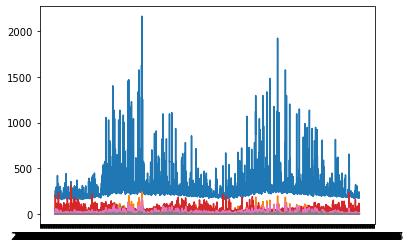

In [42]:
plot_chart(data_air, 'daily')

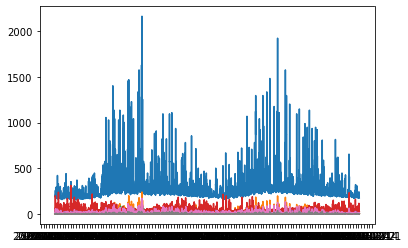

In [43]:
plot_chart(data_air, 'weekly')

In [39]:
data_air.columns

Index(['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

to save time we will export the `data_air` dataframe to csv

In [44]:
data_air.to_csv('data_air.csv')